In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Train test split and cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Machine learing models for classification problems
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import xgboost

# Hyperparameters tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Learning curve
from sklearn.model_selection import learning_curve

# Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Save the ML_model
import pickle


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


ImportError: dlopen(/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/scipy/linalg/_fblas.cpython-38-darwin.so, 0x0002): Library not loaded: @loader_path/../.dylibs/libopenblas.0.dylib
  Referenced from: /Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/scipy/linalg/_fblas.cpython-38-darwin.so
  Reason: tried: '/Users/ahmed/opt/anaconda3/lib/python3.8/site-packages/scipy/linalg/../.dylibs/libopenblas.0.dylib' (no such file), '/usr/local/lib/libopenblas.0.dylib' (no such file), '/usr/lib/libopenblas.0.dylib' (no such file)

In [113]:
df = pd.read_csv('../data/processed/preprocessed_data.csv')
df.head()

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,1,-0.440036,2,0,41,2,0.117350,1,0,1,0.216534,0
2,2,-1.536794,0,0,42,2,1.333053,3,1,0,0.240687,1
3,3,0.501521,0,0,39,2,-1.225848,2,0,0,-0.108918,0
4,4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [114]:
# Drop the column Unnamed: 0
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Create a pipeline

In [115]:
# Create a pipeline
def select_best_model(X,y,type_sampler):
	
	# List of the ML models
	models = [GradientBoostingClassifier(),LogisticRegression(),RandomForestClassifier(),ExtraTreesClassifier(),
	DecisionTreeClassifier(),xgboost.XGBClassifier(),xgboost.XGBRFClassifier()]

        
	for model in models:
		# Train and test split
		X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

		# Sampling
		sampler = type_sampler
		X_ru , y_ru = sampler.fit_resample(X_train,y_train)

		# Fit the model
		model.fit(X_ru,y_ru)

		# Evaluate the model
		y_pred = model.predict(X_test)
		print(str(model) + " : " + str(model.score(X_test,y_test)))
		print("f1_score" + " : " + str(f1_score(y_pred,y_test)))
		print("\n")	 
	
	


# Select ML_model

In [116]:
# Independents features
X = df.drop(['churn'],axis=1)

# Target feature
y = df.churn

In [117]:
select_best_model(X,y,RandomOverSampler())

GradientBoostingClassifier() : 0.7965
f1_score : 0.5974282888229476


LogisticRegression() : 0.7075
f1_score : 0.48000000000000004


RandomForestClassifier() : 0.8515
f1_score : 0.5948158253751705


ExtraTreesClassifier() : 0.8555
f1_score : 0.5491419656786272


DecisionTreeClassifier() : 0.793
f1_score : 0.4850746268656716


[13:25:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='

We can see that RandomForestClassifier has the best scores, so we will choose him

In [118]:
# Train and test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
# Sampling
sampler = RandomOverSampler()
X_ru , y_ru = sampler.fit_resample(X_train,y_train)

In [120]:
# Fit and score model
model = RandomForestClassifier()
model.fit(X_ru,y_ru)
model.score(X_test,y_test)

0.852

In [121]:
# Cross val score
cross_val_score(model,X_train,y_train,cv=15).mean()

0.8573743421098861

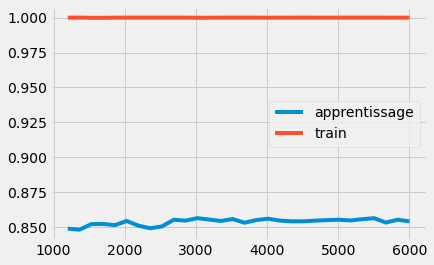

In [59]:
# Learning curve
N , train_score , val_score = learning_curve(model , X_train , y_train , train_sizes=np.linspace(0.2,1.0,30) , cv=4)

plt.plot(N , val_score.mean(axis=1) , label = 'apprentissage')
plt.plot(N , train_score.mean(axis=1) , label = 'train')
plt.legend()

In [122]:
y_pred = model.predict_proba(X_test)
y_pred_new = []

for pred in y_pred[:,1]:
    if pred >= 0.30:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
        

pred = model.predict(X_test)

In [123]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000



We can see that we have better results when we change the threshold of the model.predict_proba to 0,57 instead 0.50

# Hyperparameters tunning

In [124]:
n_estimators = [10, 50, 100, 250]
max_depth = [3, 5, 7]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = ['accuracy', 'f1'], refit='f1', n_jobs=-1)
gd.fit(X_ru, y_ru)
print('valid f1:', gd.best_score_)
print('best paramters:', gd.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
valid f1: 0.8022240688772146
best paramters: {'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 2, 'n_estimators': 250}


In [125]:
print('valid f1:', gd.best_score_)
print('best paramters:', gd.best_params_)

valid f1: 0.8022240688772146
best paramters: {'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 2, 'n_estimators': 250}


In [126]:
model = RandomForestClassifier(max_depth=7,max_features=0.8,min_samples_leaf=2,n_estimators=250)
model.fit(X_ru,y_ru)
model.score(X_test,y_test)

0.801

In [127]:
cross_val_score(model,X_train,y_train,cv=5).mean()

0.8573749999999999

In [134]:
y_pred = model.predict_proba(X_test)
y_pred_new = []

for pred in y_pred[:,1]:
    if pred >= 0.52:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
        

pred = model.predict(X_test)

In [135]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1607
           1       0.52      0.74      0.61       393

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.81      0.82      2000



We see her that we have a better performance of our model with hyperparameters tuning.

# Save the model

In [68]:
with open ('../models/RandomForestClassifier2_Model_Pickle','wb') as f:
	pickle.dump(model,f)

# Feature selection

In [136]:
# Building the model
extra_tree_forest = RandomForestClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

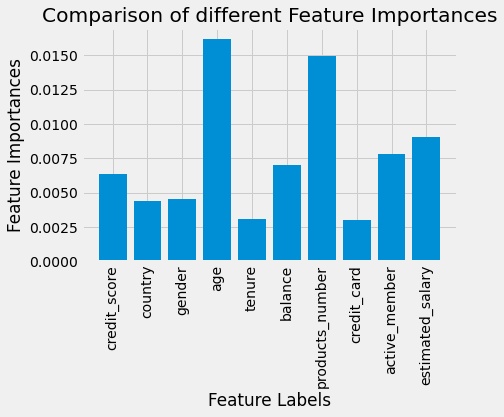

In [70]:

# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(rotation=90)
plt.show()

Let's select the most important features

In [137]:
# Independents features
X = df[['credit_score','age','products_number','active_member']]

# Target feature
y = df.churn

In [138]:
# Train and test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
# Over sampling
X_ru , y_ru = sampler.fit_resample(X_train,y_train)

In [140]:
# Fit and score the performance of the model
model.fit(X_ru,y_ru)
model.score(X_test,y_test)

0.785

In [141]:
cross_val_score(model,X_train,y_train,cv=5).mean()

0.85225

In [144]:
y_pred = model.predict_proba(X_test)
y_pred_new = []

for pred in y_pred[:,1]:
    if pred >= 0.51:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
        

pred = model.predict(X_test)

In [145]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1607
           1       0.48      0.69      0.56       393

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.71      2000
weighted avg       0.83      0.79      0.80      2000



We have here a lower performance performance of the model with only 4 input variables.